In [1]:
import pandas as pd
import soccerdata as sd
import warnings
import matplotlib.pyplot as plt

import sys
import os
warnings.filterwarnings("ignore")

# Add project root to Python path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from functions import *

season = "2025-26"
fbref = sd.FBref("Big 5 European Leagues Combined", season)

[12/25/25 12:55:57] INFO     No custom team name replacements found. You can configure these in       ]8;id=638000;file://c:\Python310\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=959322;file://c:\Python310\lib\site-packages\soccerdata\_config.py#91\91]8;;\
                             C:\Users\Yassine\soccerdata\config\teamname_replacements.json.                        

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=766254;file://c:\Python310\lib\site-packages\soccerdata\_config.py\_config.py]8;;\:]8;id=835341;file://c:\Python310\lib\site-packages\soccerdata\_config.py#197\197]8;;\
                             C:\Users\Yassine\soccerdata\config\league_dict.json.                                  

[12/25/25 12:56:01] INFO     Saving cached data to C:\Users\Yassine\soccerdata\data\FBref            ]8;id=777118;file://c:\Python310\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=821722;file://c:\Python310\lib\site-packages\soccerdata\_common.py#263\263]8;;\

## Explore Data

In [7]:
#import functions from functions.py
for i in ["shooting", "passing", "goal_shot_creation", "defense", "possession"]:
    globals()[f"{i}_df"] = read_players_data(fbref, i, "ESP-La Liga")

In [16]:
shooting_cols = ['team_', 'player_', 'nation_', 'pos_', 'age_',
       '90s_', 'Standard_Gls', 'Standard_Sh', 'Standard_SoT',
       'Standard_Sh/90', 'Standard_SoT/90', 'Standard_Dist', 'Standard_FK', 'Expected_xG',
       'Expected_G-xG', 'Expected_np:G-xG']
shooting_df = shooting_df[shooting_cols]

passing_cols = ['team_', 'player_', 'nation_', 'pos_', 'age_',
       '90s_', 'Total_Cmp', 'Total_Att','Total_TotDist', 'Total_PrgDist', 
       'Short_Cmp', 'Short_Att','Medium_Cmp', 'Medium_Att', 'Long_Cmp',
       'Long_Att', 'Ast_', 'xAG_', 'Expected_xA',
       'Expected_A-xAG', 'KP_', '1/3_', 'PPA_', 'CrsPA_', 'PrgP_']
passing_df = passing_df[passing_cols]

goal_shot_creation_cols = ['team_', 'player_', 'nation_', 'pos_', 'age_',
      '90s_', 'SCA_SCA', 'SCA_SCA90', 'SCA Types_PassLive',
       'SCA Types_PassDead', 'SCA Types_TO', 'SCA Types_Sh', 'SCA Types_Fld',
       'SCA Types_Def', 'GCA_GCA', 'GCA_GCA90', 'GCA Types_PassLive',
       'GCA Types_PassDead', 'GCA Types_TO', 'GCA Types_Sh', 'GCA Types_Fld',
       'GCA Types_Def']
goal_shot_creation_df = goal_shot_creation_df[goal_shot_creation_cols]

defense_cols = ['team_', 'player_', 'nation_', 'pos_', 'age_',
       '90s_', 'Tackles_Tkl', 'Tackles_TklW', 'Tackles_Def 3rd',
       'Tackles_Mid 3rd', 'Tackles_Att 3rd', 'Challenges_Tkl',
       'Challenges_Att', 'Challenges_Lost', 'Blocks_Blocks',
       'Blocks_Sh', 'Blocks_Pass', 'Int_', 'Clr_', 'Err_']
defense_df = defense_df[defense_cols]

possession_cols = ['team_', 'player_', 'nation_', 'pos_', 'age_',
       '90s_', 'Touches_Touches', 'Touches_Def Pen',
       'Touches_Def 3rd', 'Touches_Mid 3rd', 'Touches_Att 3rd',
       'Touches_Att Pen', 'Touches_Live', 'Take-Ons_Att', 'Take-Ons_Succ',
        'Take-Ons_Tkld', 'Carries_Carries','Carries_TotDist', 'Carries_PrgDist',
        'Carries_PrgC', 'Carries_1/3','Carries_CPA', 'Carries_Mis', 'Carries_Dis',
        'Receiving_Rec','Receiving_PrgR']
possession_df = possession_df[possession_cols]


In [39]:
#filter on Azzedine Ounahi
ounahi_shooting = shooting_df[shooting_df['player_'] == 'Azzedine Ounahi']
ounahi_passing = passing_df[passing_df['player_'] == 'Azzedine Ounahi']
ounahi_goal_shot_creation = goal_shot_creation_df[goal_shot_creation_df['player_'] == 'Azzedine Ounahi']
ounahi_defense = defense_df[defense_df['player_'] == 'Azzedine Ounahi']
ounahi_possession = possession_df[possession_df['player_'] == 'Azzedine Ounahi']

In [69]:
radar_df = pd.concat([ounahi_shooting, ounahi_passing, ounahi_goal_shot_creation, ounahi_defense, ounahi_possession], axis=1)
radar_df = radar_df.loc[:,~radar_df.columns.duplicated()]
radar_df.reset_index(drop=True, inplace=True)
radar_df.columns

Index(['team_', 'player_', 'nation_', 'pos_', 'age_', '90s_', 'Standard_Gls',
       'Standard_Sh', 'Standard_SoT', 'Standard_Sh/90', 'Standard_SoT/90',
       'Standard_Dist', 'Standard_FK', 'Expected_xG', 'Expected_G-xG',
       'Expected_np:G-xG', 'Total_Cmp', 'Total_Att', 'Total_TotDist',
       'Total_PrgDist', 'Short_Cmp', 'Short_Att', 'Medium_Cmp', 'Medium_Att',
       'Long_Cmp', 'Long_Att', 'Ast_', 'xAG_', 'Expected_xA', 'Expected_A-xAG',
       'KP_', '1/3_', 'PPA_', 'CrsPA_', 'PrgP_', 'SCA_SCA', 'SCA_SCA90',
       'SCA Types_PassLive', 'SCA Types_PassDead', 'SCA Types_TO',
       'SCA Types_Sh', 'SCA Types_Fld', 'SCA Types_Def', 'GCA_GCA',
       'GCA_GCA90', 'GCA Types_PassLive', 'GCA Types_PassDead', 'GCA Types_TO',
       'GCA Types_Sh', 'GCA Types_Fld', 'GCA Types_Def', 'Tackles_Tkl',
       'Tackles_TklW', 'Tackles_Def 3rd', 'Tackles_Mid 3rd', 'Tackles_Att 3rd',
       'Challenges_Tkl', 'Challenges_Att', 'Challenges_Lost', 'Blocks_Blocks',
       'Blocks_Sh', 'Blocks_P

In [70]:
#keep only relevant columns for radar chart
radar_df = radar_df[[
                    'Standard_SoT',
                     'Ast_','KP_', '1/3_', 'PrgP_',
                     'SCA_SCA', 'GCA_GCA',
                     'Tackles_Tkl',  'Int_','Blocks_Blocks', 'Err_']]

radar_df = radar_df.div(8)


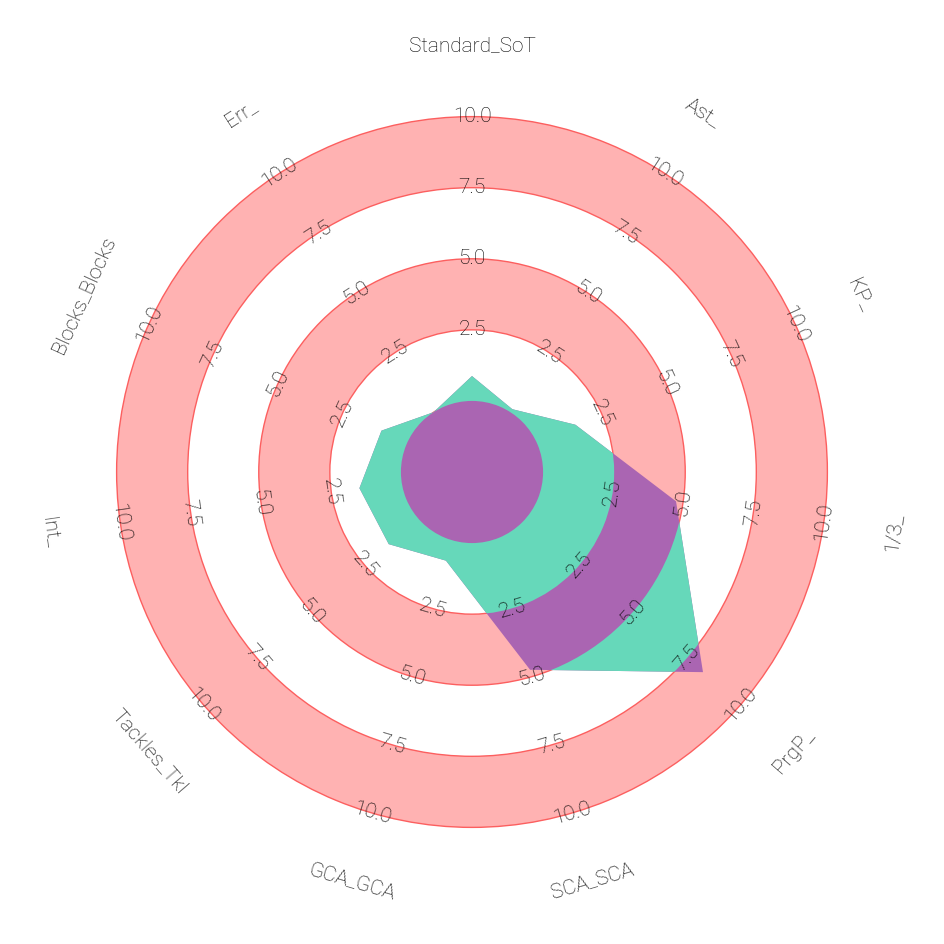

In [73]:
params = radar_df.columns.tolist()
values = radar_df.loc[0].values.tolist()


URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
# Parameters
low = [0] * len(params)   # Min scale
high = [10] * len(params)  # Max scale (percentiles)
radar = Radar(params, low, high)

fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the param labels